In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import sys
from glob import glob
import os, os.path


%matplotlib inline

In [41]:
DATASETS_DIR = "../datasets/"

ACANS_DIR = DATASETS_DIR + "acans"
ACROS_DIR = DATASETS_DIR + "acros"
CHALICES_DIR = DATASETS_DIR + "chalices"
MONTIES_DIR = DATASETS_DIR + "montis"
HAMMERS_DIR = DATASETS_DIR + "hammers"
TORCHES_DIR = DATASETS_DIR + "torches"
ZOAS_DIR = DATASETS_DIR + "zoas"

dirs = [
    ACANS_DIR, ACROS_DIR, CHALICES_DIR, HAMMERS_DIR, MONTIES_DIR, TORCHES_DIR, ZOAS_DIR
]

In [42]:
dic = {}
for dataset_path in dirs:
    path, directories, files = os.walk(dataset_path).__next__()
    dic[dataset_path.split("/")[-1]] = len(files)
    
print(dic)

{'acans': 476, 'acros': 1122, 'chalices': 648, 'hammers': 654, 'montis': 742, 'torches': 657, 'zoas': 661}


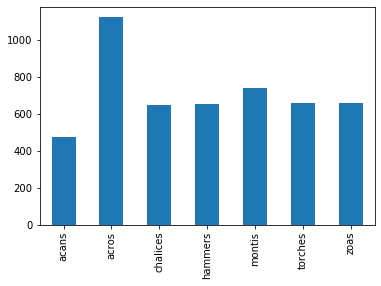

In [43]:
series = pd.Series(data=dic)
series.plot.bar()

In [44]:
series.to_frame()

,0
acans,476
acros,1122
chalices,648
hammers,654
montis,742
torches,657
zoas,661


In [45]:
coll = io.ImageCollection(ACANS_DIR + "/*.jfif")
print(len(coll))
print(coll[0].shape)

476
(300, 320, 3)


In [49]:
# load 3 images for each class
images_to_plot = []
for dataset_path in dirs:
    coll = io.ImageCollection(dataset_path + "/*.jfif")
    for i in range(3):
        images_to_plot.append(coll[i])

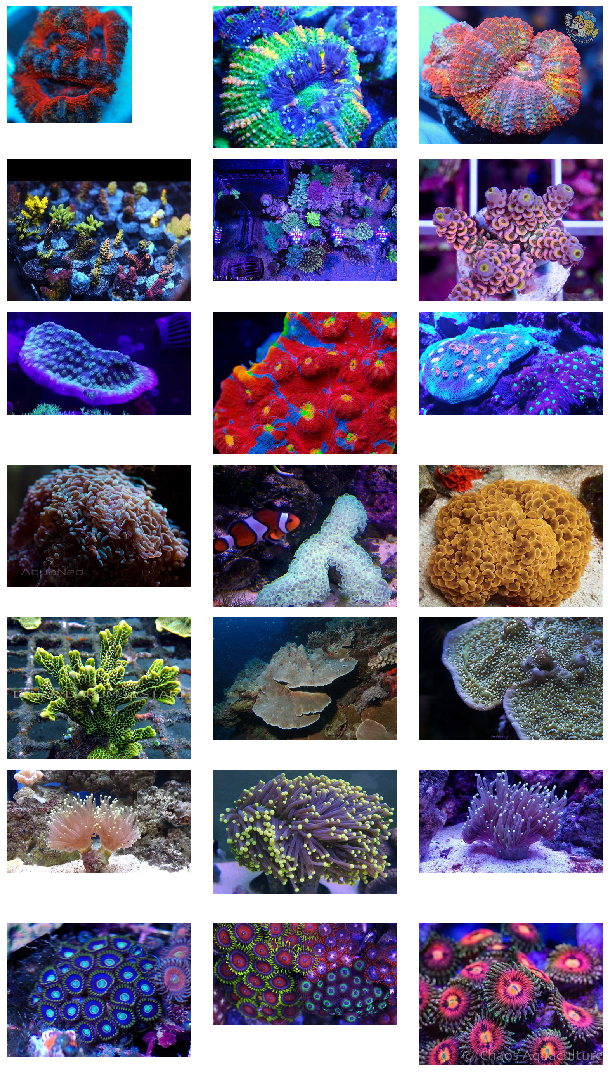

In [50]:
# Show the segmentations.
fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(9, 15), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box'})
ax = axes.ravel()
for i in range(7 * 3):
    ax[i].imshow(images_to_plot[i])

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()